In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sys
sys.path.append("../src")  
import preprocess
import data_loader


df = data_loader.load_and_analyze("../data/raw/diabetic_data.csv")


df = preprocess.clean_missing_values(df)
df = preprocess.filter_eligible_population(df)
df = preprocess.binarize_target(df)
df = preprocess.engineer_features(df)
df = preprocess.encode_categorical_features(df)


train_df, test_df = data_loader.split_data_clinically(
    df,
    target_col="readmitted",
    group_col="patient_nbr"
)

total records: 101766
unique patients: 71518
patients with multiple visits: 16773


In [3]:
numeric_cols = [
    'time_in_hospital',
    'num_lab_procedures',
    'total_utilization',
    'num_procedures',
    'num_medications',
    'number_diagnoses',
    'number_outpatient',
    'number_emergency',
    'number_inpatient'
]
train_df[numeric_cols].describe()


,time_in_hospital,num_lab_procedures,total_utilization,num_procedures,num_medications,number_diagnoses,number_outpatient,number_emergency,number_inpatient
count,79541.000000,79541.000000,79541.000000,79541.000000,79541.000000,79541.000000,79541.000000,79541.000000,79541.000000
mean,4.378987,42.924027,1.199683,1.330572,15.983656,7.398562,0.369533,0.198677,0.631473
std,2.965798,19.575774,2.269180,1.700227,8.113520,1.944777,1.244375,0.946064,1.248577
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,0.000000,10.000000,6.000000,0.000000,0.000000,0.000000
50%,4.000000,44.000000,0.000000,1.000000,15.000000,8.000000,0.000000,0.000000,0.000000
75%,6.000000,57.000000,2.000000,2.000000,20.000000,9.000000,0.000000,0.000000,1.000000
max,14.000000,132.000000,80.000000,6.000000,81.000000,16.000000,40.000000,76.000000,21.000000


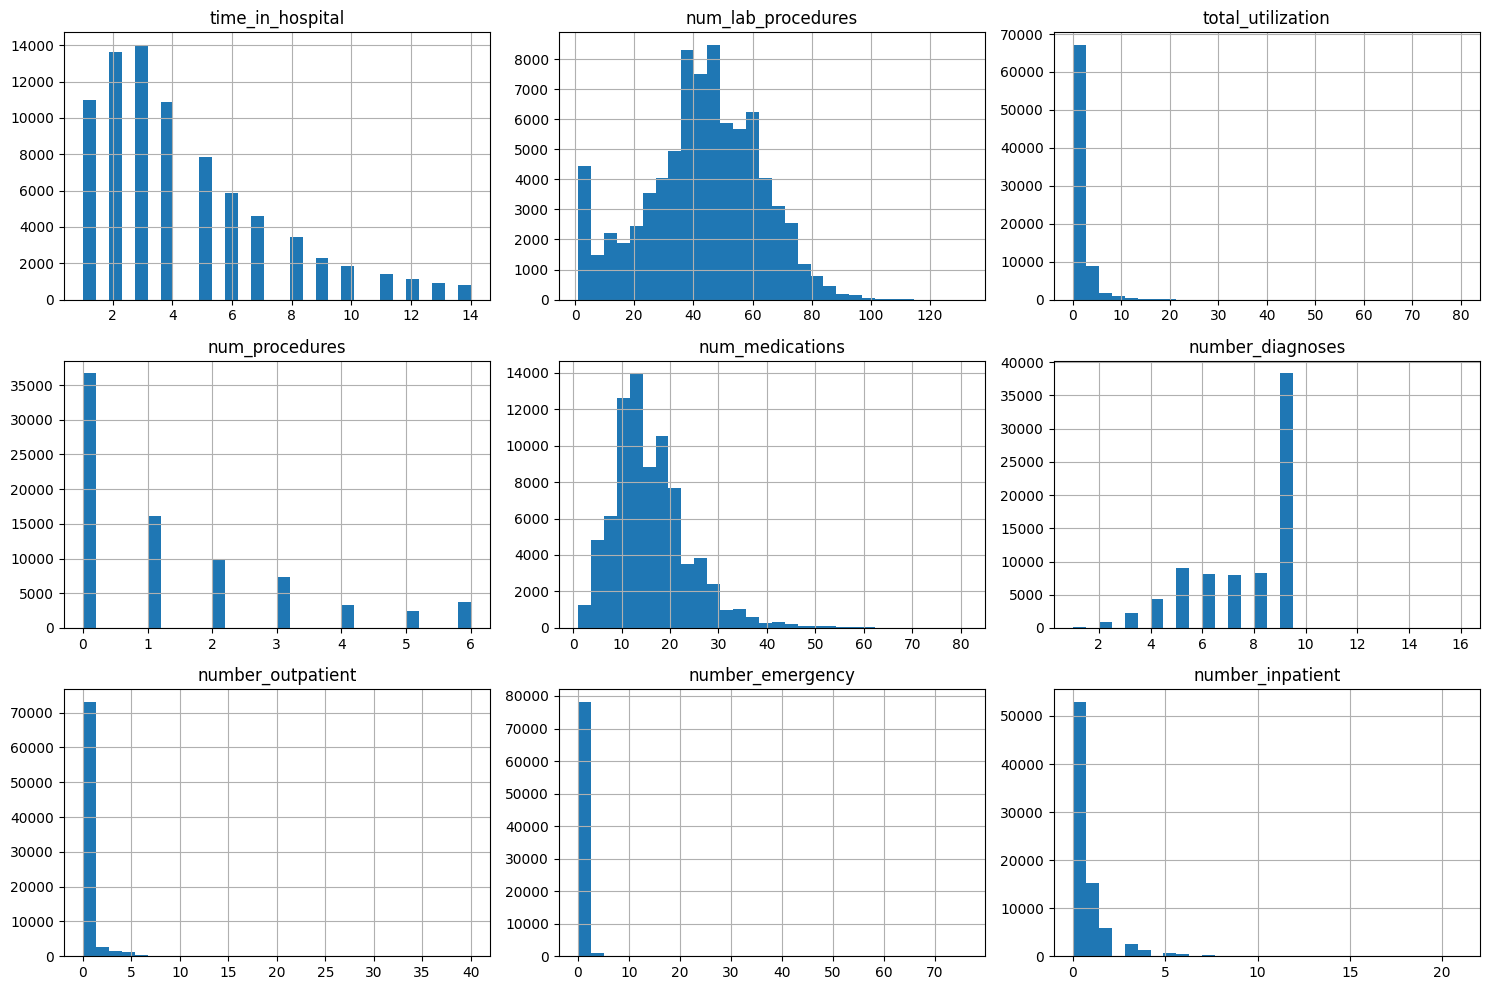

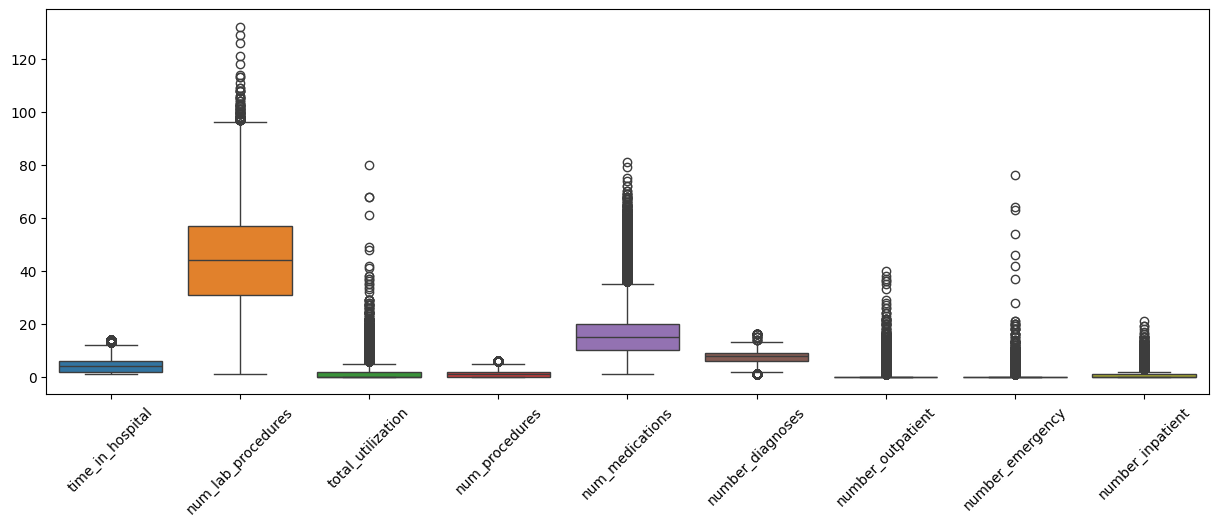

In [4]:

train_df[numeric_cols].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


plt.figure(figsize=(15,5))
sns.boxplot(data=train_df[numeric_cols])
plt.xticks(rotation=45)
plt.show()

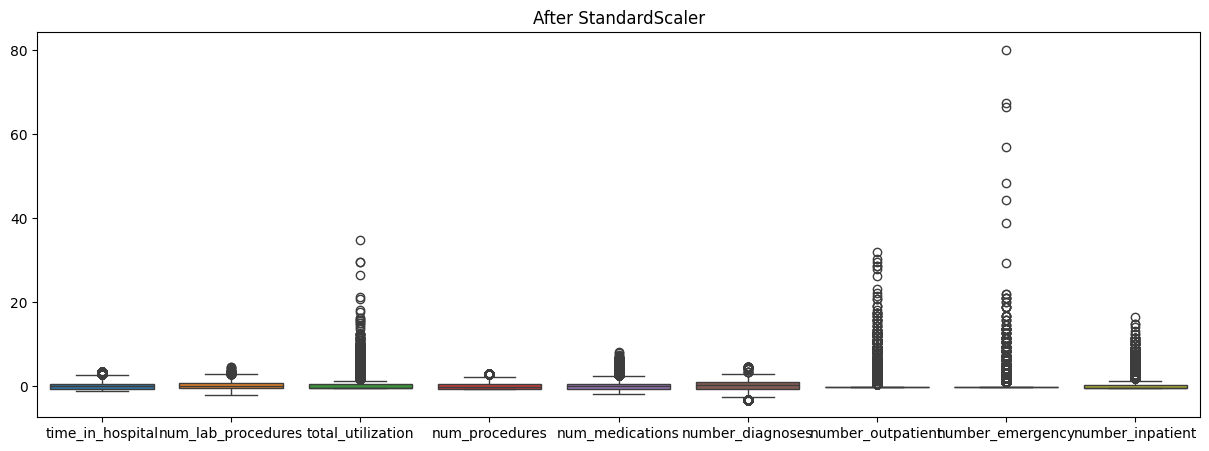

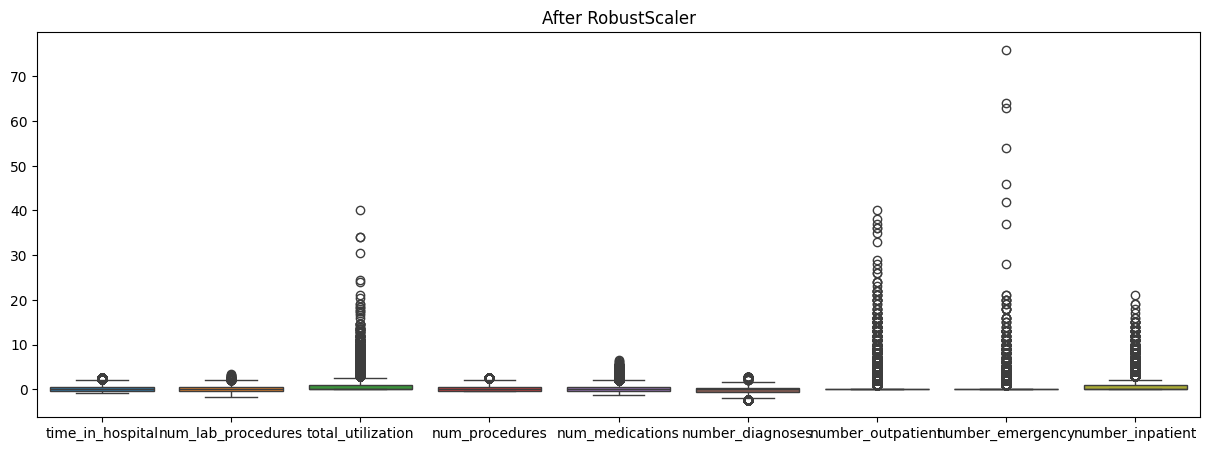

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler

sc_std = StandardScaler()
sc_rob = RobustScaler()

scaled_std = sc_std.fit_transform(train_df[numeric_cols])
scaled_rob = sc_rob.fit_transform(train_df[numeric_cols])


df_std = pd.DataFrame(scaled_std, columns=numeric_cols)
df_rob = pd.DataFrame(scaled_rob, columns=numeric_cols)


plt.figure(figsize=(15,5))
sns.boxplot(data=df_std)
plt.title("After StandardScaler")
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(data=df_rob)
plt.title("After RobustScaler")
plt.show()

In [6]:
for col in numeric_cols:
    q1 = train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ((train_df[col] < q1 - 1.5*iqr) | (train_df[col] > q3 + 1.5*iqr)).sum()
    total = train_df.shape[0]
    print(f"{col}: {outliers} outliers ({outliers/total:.2%})")

time_in_hospital: 1704 outliers (2.14%)
num_lab_procedures: 87 outliers (0.11%)
total_utilization: 3509 outliers (4.41%)
num_procedures: 3794 outliers (4.77%)
num_medications: 1973 outliers (2.48%)
number_diagnoses: 229 outliers (0.29%)
number_outpatient: 13129 outliers (16.51%)
number_emergency: 8924 outliers (11.22%)
number_inpatient: 5508 outliers (6.92%)


number_outpatient: 13129 outliers (16.51%_) quite a lot, decide to use robust scaler